In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [3]:
def model_fn(a_layer = None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [5]:
model = model_fn()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 2s 823us/step - loss: 0.2673 - accuracy: 0.9077
Epoch 2/5
1500/1500 [==============================] - 1s 789us/step - loss: 0.2589 - accuracy: 0.9101
Epoch 3/5
1500/1500 [==============================] - 1s 799us/step - loss: 0.2546 - accuracy: 0.9137
Epoch 4/5
1500/1500 [==============================] - 1s 804us/step - loss: 0.2415 - accuracy: 0.9176
Epoch 5/5
1500/1500 [==============================] - 1s 797us/step - loss: 0.2450 - accuracy: 0.9178


In [12]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


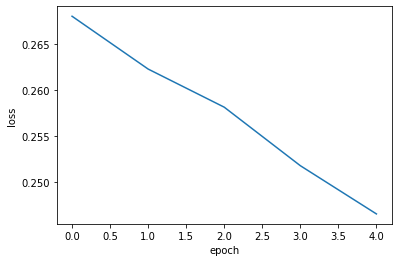

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

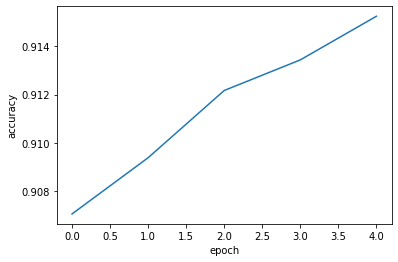

In [15]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

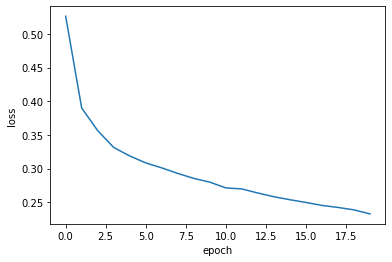

In [16]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6828 - accuracy: 0.7641 - val_loss: 0.4290 - val_accuracy: 0.8441
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4061 - accuracy: 0.8528 - val_loss: 0.4053 - val_accuracy: 0.8539
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3580 - accuracy: 0.8718 - val_loss: 0.3500 - val_accuracy: 0.8757
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3352 - accuracy: 0.8804 - val_loss: 0.3641 - val_accuracy: 0.8744
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3175 - accuracy: 0.8873 - val_loss: 0.3602 - val_accuracy: 0.8790
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3080 - accuracy: 0.8907 - val_loss: 0.3593 - val_accuracy: 0.8781
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2999 - accuracy: 0.8934 - val_loss: 0.3630 - val_accuracy:

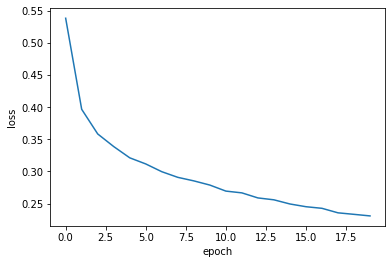

In [17]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target))

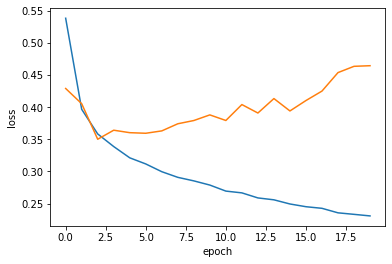

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6749 - accuracy: 0.7639 - val_loss: 0.4270 - val_accuracy: 0.8485
Epoch 2/20
1500/1500 [==============================] - 1s 977us/step - loss: 0.4047 - accuracy: 0.8545 - val_loss: 0.3662 - val_accuracy: 0.8720
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3579 - accuracy: 0.8699 - val_loss: 0.3716 - val_accuracy: 0.8694
Epoch 4/20
1500/1500 [==============================] - 1s 924us/step - loss: 0.3403 - accuracy: 0.8776 - val_loss: 0.3348 - val_accuracy: 0.8802
Epoch 5/20
1500/1500 [==============================] - 1s 939us/step - loss: 0.3076 - accuracy: 0.8879 - val_loss: 0.3318 - val_accuracy: 0.8799
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2939 - accuracy: 0.8940 - val_loss: 0.3681 - val_accuracy: 0.8709
Epoch 7/20
1500/1500 [==============================] - 1s 937us/step - loss: 0.2776 - accuracy: 0.8962 - val_loss: 0.3297 - val_a

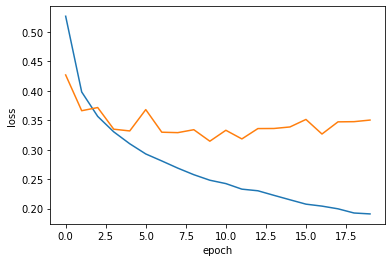

In [19]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=1 ,validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### 드롭아웃

훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서 과대적합을 막는 것이다.
즉, 이는 드롭아웃은 특정 뉴런에 과대하게 의존하는 것을 줄이고, 모든 입력에 대한 주의를 기울이기 때문이다.

In [24]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3183 - accuracy: 0.8821 - val_loss: 0.3282 - val_accuracy: 0.8816
Epoch 2/10
1500/1500 [==============================] - 1s 997us/step - loss: 0.3000 - accuracy: 0.8889 - val_loss: 0.3321 - val_accuracy: 0.8782
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3022 - accuracy: 0.8868 - val_loss: 0.3184 - val_accuracy: 0.8848
Epoch 4/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3045 - accuracy: 0.8866 - val_loss: 0.3217 - val_accuracy: 0.8832
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2896 - accuracy: 0.8916 - val_loss: 0.3214 - val_accuracy: 0.8821
Epoch 6/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2873 - accuracy: 0.8940 - val_loss: 0.3307 - val_accuracy: 0.8822
Epoch 7/10
1500/1500 [==============================] - 1s 993us/step - loss: 0.2855 - accuracy: 0.8938 - val_loss: 0.3378 - val_accur

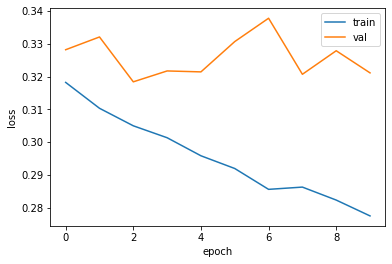

In [41]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, 
                    validation_data= (val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()


### 모델 저장과 복원

케라스 모델은 훈련된 모델의 파라미터를 저장하는 간편한 save_weights(), save()로 저장할 수 있다.

**save_weights - load_weights**<br>
**save - load_model**<br>

In [26]:
model.save_weights('model-weights.h5')

In [27]:
model.save('model-whole.h5')

In [28]:
!ls -al *.h5

-rw-r--r--  1 seongyeonkim  staff  332480  3 31 02:33 model-weights.h5
-rw-r--r--  1 seongyeonkim  staff  981776  3 31 02:33 model-whole.h5


In [29]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

In [38]:
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis = -1)
print(val_labels)
print(np.mean(val_labels == val_target))


[8 8 7 ... 8 8 6]
0.8821666666666667


In [40]:
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 575us/step - loss: 0.3246 - accuracy: 0.8822


[0.324635773897171, 0.8821666836738586]

### 콜백(callback)

앞선 과정에서 20번의 에포크 동안 모델을 훈련하여 검증 점수가 상승하는 지점을 확인했다. 과대적합이 나왔기에 우리는 다시 10번의 에포크를 맞추어 훈련하였다.

이런 과정을 두 번 진행하는 것은 시간이 많이 들기 때문에 콜백을 이용한다. 이에 keras는 **ModelCheckpoint로 최상의 검증 점수**를 만드는 모델을 저장합니다.

### 조기 종료(early stopping)

이런 과정 속에서 검증 점수가 상승하기 시작하면 그때부터 과대적합으로 이어지기 때문에 굳이 이어서 훈련할 필요가 없다. 즉, 조기 종료는 에포크 횟수를 제한하기도 하지만 과대적합을 막아주는 규제역할도 한다.
**EarlyStopping** 콜백을 통해 patience는 검증점수가 향상되지 않더라도 참을 횟수, restore_weights는 가장 낮은 검증 손실을 낸 모델 파라미터를 반환한다.

In [42]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
model.fit(train_scaled, train_target, epochs=20, verbose=0, 
          validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

In [43]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 580us/step - loss: 0.3242 - accuracy: 0.8867


[0.3242073953151703, 0.8866666555404663]

In [44]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, 
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
          validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

In [45]:
print(early_stopping_cb.stopped_epoch)

5


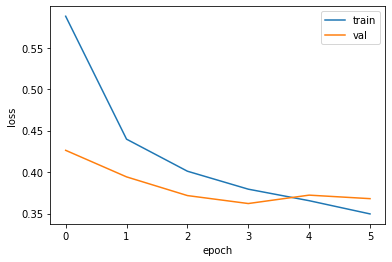

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()


In [49]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 624us/step - loss: 0.3620 - accuracy: 0.8645


[0.3620312213897705, 0.8644999861717224]